# Python Assignment 1 Kinetic Modelling

---

Please read the introduction document before starting this assignment. First we will look into simple unimolecular and bimolecular reactions, we will use scipy.integrate.ode_int() on these problems aswell to see how close they are to the analytical solutions. Then we will go into more complicated mechnisms that cannot be solved analytically and compare to experimental data. To estimate kinetic parameters

As a first excersize, define functions for the unimolecular and bimolecular reactions as given in the introducary documents and plot both concentrations in time, use k1 = 0.1 s$^{-1}$ and k2 = 50 s$^{-1}$ M$^{-1}$ and initial concentrations 10 mM. Make sure to go the a time where the reaction is complete i.e. the concentrations don't change anymore


In [2]:
#Modules needed for this assignment
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

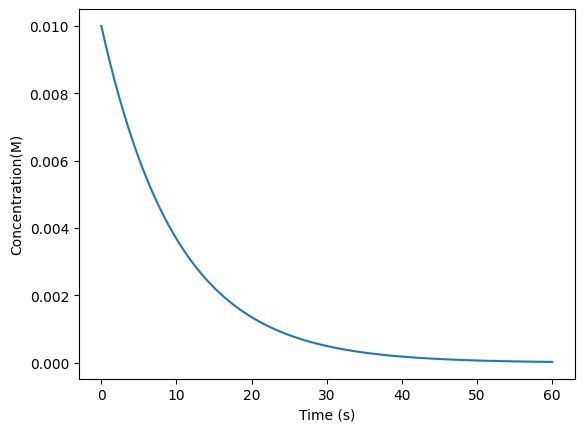

In [3]:
# UNIMOLECULAR REACTION (A → B)

#given rate constant
k1 = 0.1 #s-1

#given initial concentration
C0 = 0.01 #M

# def the function for the unimolecular reaction with [C] = [C]0 exp(-kt)
def unimolecular(t, C0, k1):
  return(C0*np.exp(-k1*t))

# give the range for time to be evaluated
t = np.linspace(0,60,100)

#input the given parameters into the defined function
C = unimolecular(t,0.01,0.1)

#plot the concetration v/s time graph and label the axes
plt.plot(t,C)
plt.xlabel('Time (s)') #xlabel
plt.ylabel('Concentration(M)') #ylabel
plt.show()

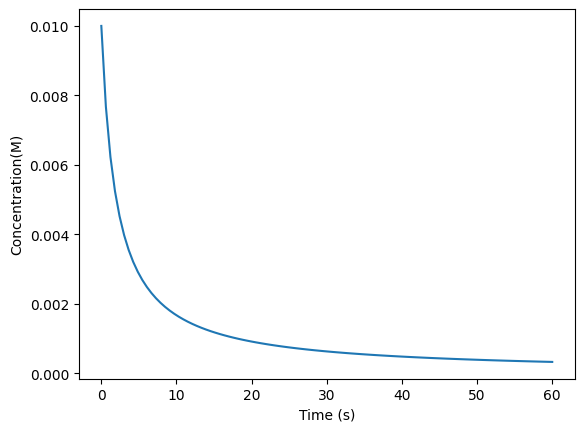

In [4]:
# BIMOLECULAR REACTION (A + A → B)

#given rate constant
k2 = 50 #M-1 s-1

#given initial concentration
C0 = 0.01 #M

# def the function for the unimolecular reaction with [C] = [C]0 / (1+k2*t*[C0])
def bimolecular(t, C0, k2):
  return(C0/(1+k2*t*C0))

# give the range for time to be evaluated
t = np.linspace(0,60,100)

#input the given parameters into the defined function
C = bimolecular(t,0.01,50)

#plot the concetration v/s time graph and label the axes
plt.plot(t,C)
plt.xlabel('Time (s)') #xlabel
plt.ylabel('Concentration(M)') #ylabel
plt.show()


Now we want to use numerical methods to calculate the concentrations versus time. If we look at the documentation for solve_ivp, we have to give a function, which outputs all the derivations of our model. In the examples above we only have one concentration so we have a define a function of only the gives back dA/dt. Tests these numerical modesl with the analytical solutions for validity. Do this for both the unimolecular and bimolecular reactions. Note: the kinetic parameters can be given in solve_ivp as args = [k1].

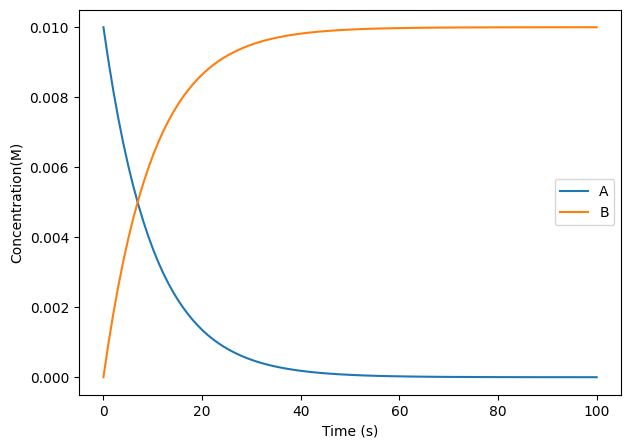

In [5]:
# UNIMOLECULAR REACTION - SOLVING ODE (A → B)

#given initial concentrations
A0 = 0.01 #M
B0 = 0 #M

#given rate constant
k1 = 0.1 # s-1

# def the function for the unimolecular reaction with -dA/dt = dB/dt = k1A
def model_unimolecular(t, conc, k1):
  A, B = conc
  dAdt = -k1 * A
  dBdt = k1 * A
  return[dAdt,dBdt]

#time span for integration
t_span = (0,100)

#solving the ODE
solution_unimolecular = solve_ivp(model_unimolecular,t_span,[A0,B0],args=(k1,),t_eval = np.linspace(0,100,100))

#plot the conc vs time graph
plt.figure(figsize=(7,5))
plt.plot(solution_unimolecular.t, solution_unimolecular.y[0], label="A")
plt.plot(solution_unimolecular.t, solution_unimolecular.y[1], label="B")
plt.legend()
plt.xlabel('Time (s)') #xlabel
plt.ylabel('Concentration(M)') #ylabel
plt.show()


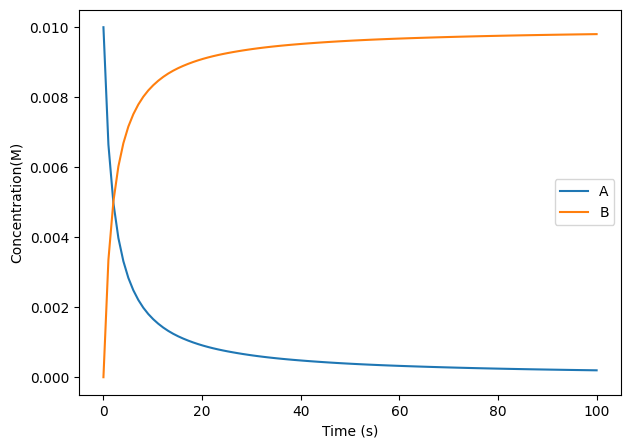

In [6]:
# BIMOLECULAR REACTION - SOLVING ODE (A + A → B)

# def the function for the bimolecular reaction with -dA/dt = dB/dt = k1[A]^2
def bimolecular_reaction(t,concentrations,k2):
  A, B = concentrations
  dAdt = - k2 * A * A
  dBdt = k2 * A * A
  return[dAdt, dBdt]

# given intial concentration
A0 = 0.01 # M
B0 = 0 # M

# given rate constant
k2 = 50 # M-1 s-1

# time apan for integration
t_span = (0,100)

#solving the ODE
solution = solve_ivp(bimolecular_reaction, t_span, [A0,B0], args=(k2,), t_eval=np.linspace(0,100,100))

#plotting the concentration v/s time graph
plt.figure(figsize=(7,5))
plt.plot(solution.t, solution.y[0],label='A')
plt.plot(solution.t, solution.y[1],label='B')
plt.legend()
plt.xlabel('Time (s)') #xlabel
plt.ylabel('Concentration(M)') #ylabel
plt.show()

You have gotten good aggrement with the numerical and analytical solutions. Now we will continue to look as cases where there is no analytical solution possible. First we will look at the pre-equilibrium case of the document:
$$
A + B \rightleftharpoons_{k2}^{k1} C \xrightarrow{k3} D
$$
The kinetic equations are given the document also. Calculate the calculations over time with the following paramters:

A[0] = 10 mM \\
B[0] = 20 mM \\
C[0] = 0 mM \\
D[0] = 0 mM \\

k1 = 100 s$^{-1}$ M$^{-1}$ \\
k2 = 0.5 s$^{-1}$ M$^{-1}$ \\
k3 = 0.1 s$^{-1}$ \\

Hint: you can increase the number of points at which the model is evalutated by added for example: 't_eval = np.linspace(0, 30, 1000)' (this means t is evaluated at 1000 points, equally spaced between 0 and 30, so the 30 should be changed to increase the range)


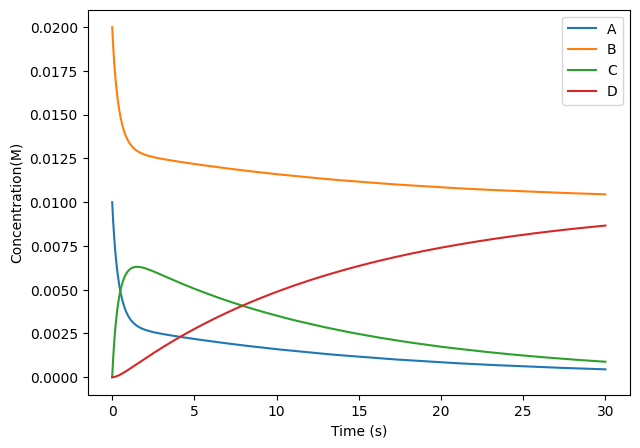

In [7]:
# PRE-EQUILIBRIUM CONDITION A + B ⇌ C −→ D

#given initial concentrations
A0 = 0.01 #M
B0 = 0.02 #M
C0 = 0 #M
D0 = 0 #M

# given rate constants
k1 = 100 #s-1 M-1
k2 = 0.5 #s-1 M-1
k3 = 0.1 #s-1

#define the function for the differential rate equations
def kinetic_equations(t,y,k1,k2):
  A, B, C, D = y
  dAdt = k2*C - k1*A*B
  dBdt = k2*C - k1*A*B
  dCdt = k1*A*B - k2*C - k3*C
  dDdt = k3*C
  return(dAdt,dBdt,dCdt,dDdt)

#time span for integration
t_spn = (0,30)

#solving the ODE
solution = solve_ivp(kinetic_equations, t_spn, [A0,B0,C0,D0], args =(k1,k2,), t_eval = np.linspace(0,30,1000))

#plotting the concentration vs time graph
plt.figure(figsize = (7, 5))
plt.plot(solution.t, solution.y[0],label='A')
plt.plot(solution.t, solution.y[1],label='B')
plt.plot(solution.t, solution.y[2],label='C')
plt.plot(solution.t, solution.y[3],label='D')
plt.legend()
plt.xlabel('Time (s)') #xlabel
plt.ylabel('Concentration(M)') #ylabel
plt.show()

It is often not possible to observe intermediates (in this case species C) under normal conditions. A typical limit-of-detection is about 10 mM (for Raman spectroscopy) Change k1 and k3 untill a reasonable (~0.001 M) concentration of [C] is build up, asses of how the maximum concentration of [C] is affected by changing k1 and k3.

# Complicated Reaction Mechanisms
Calculate the concentrations in time for the following system:

\begin{array} \\
A + B & \rightleftharpoons_{k2}^{k1} C \\
C + D & \xrightarrow{k3} E + A \\
E + F & \xrightarrow{k4} D + G \\
E + H & \xrightarrow{k5} D + I\\
\end{array}

with:

$$
\begin{align}
k_1&= 3 \text{ M$^{-1}$ s$^{-1}$} \\
k_2&= 2 \text{ s$^{-1}$} \\
k_3&= 2 \text{ M$^{-1}$ s$^{-1}$} \\
k_4&= 0.1 \text{ M$^{-1}$ s$^{-1}$} \\
k_5&= 0.12 \text{ M$^{-1}$ s$^{-1}$} \\
[A]_0 & = 0.10 \text{ M} \\
[B]_0 & = 0.10 \text{ M} \\
[C]_0 & = 0 \text{ M} \\
[D]_0 & = 0.01 \text{ M} \\
[E]_0 & = 0 \text{ M} \\
[F]_0 & = 0.10 \text{ M} \\
[G]_0 & = 0 \text{ M} \\
[H]_0 & = 0.10 \text{ M} \\
[I]_0 & = 0\text{ M} \\
\end{align}
$$

<Figure size 1000x1000 with 0 Axes>

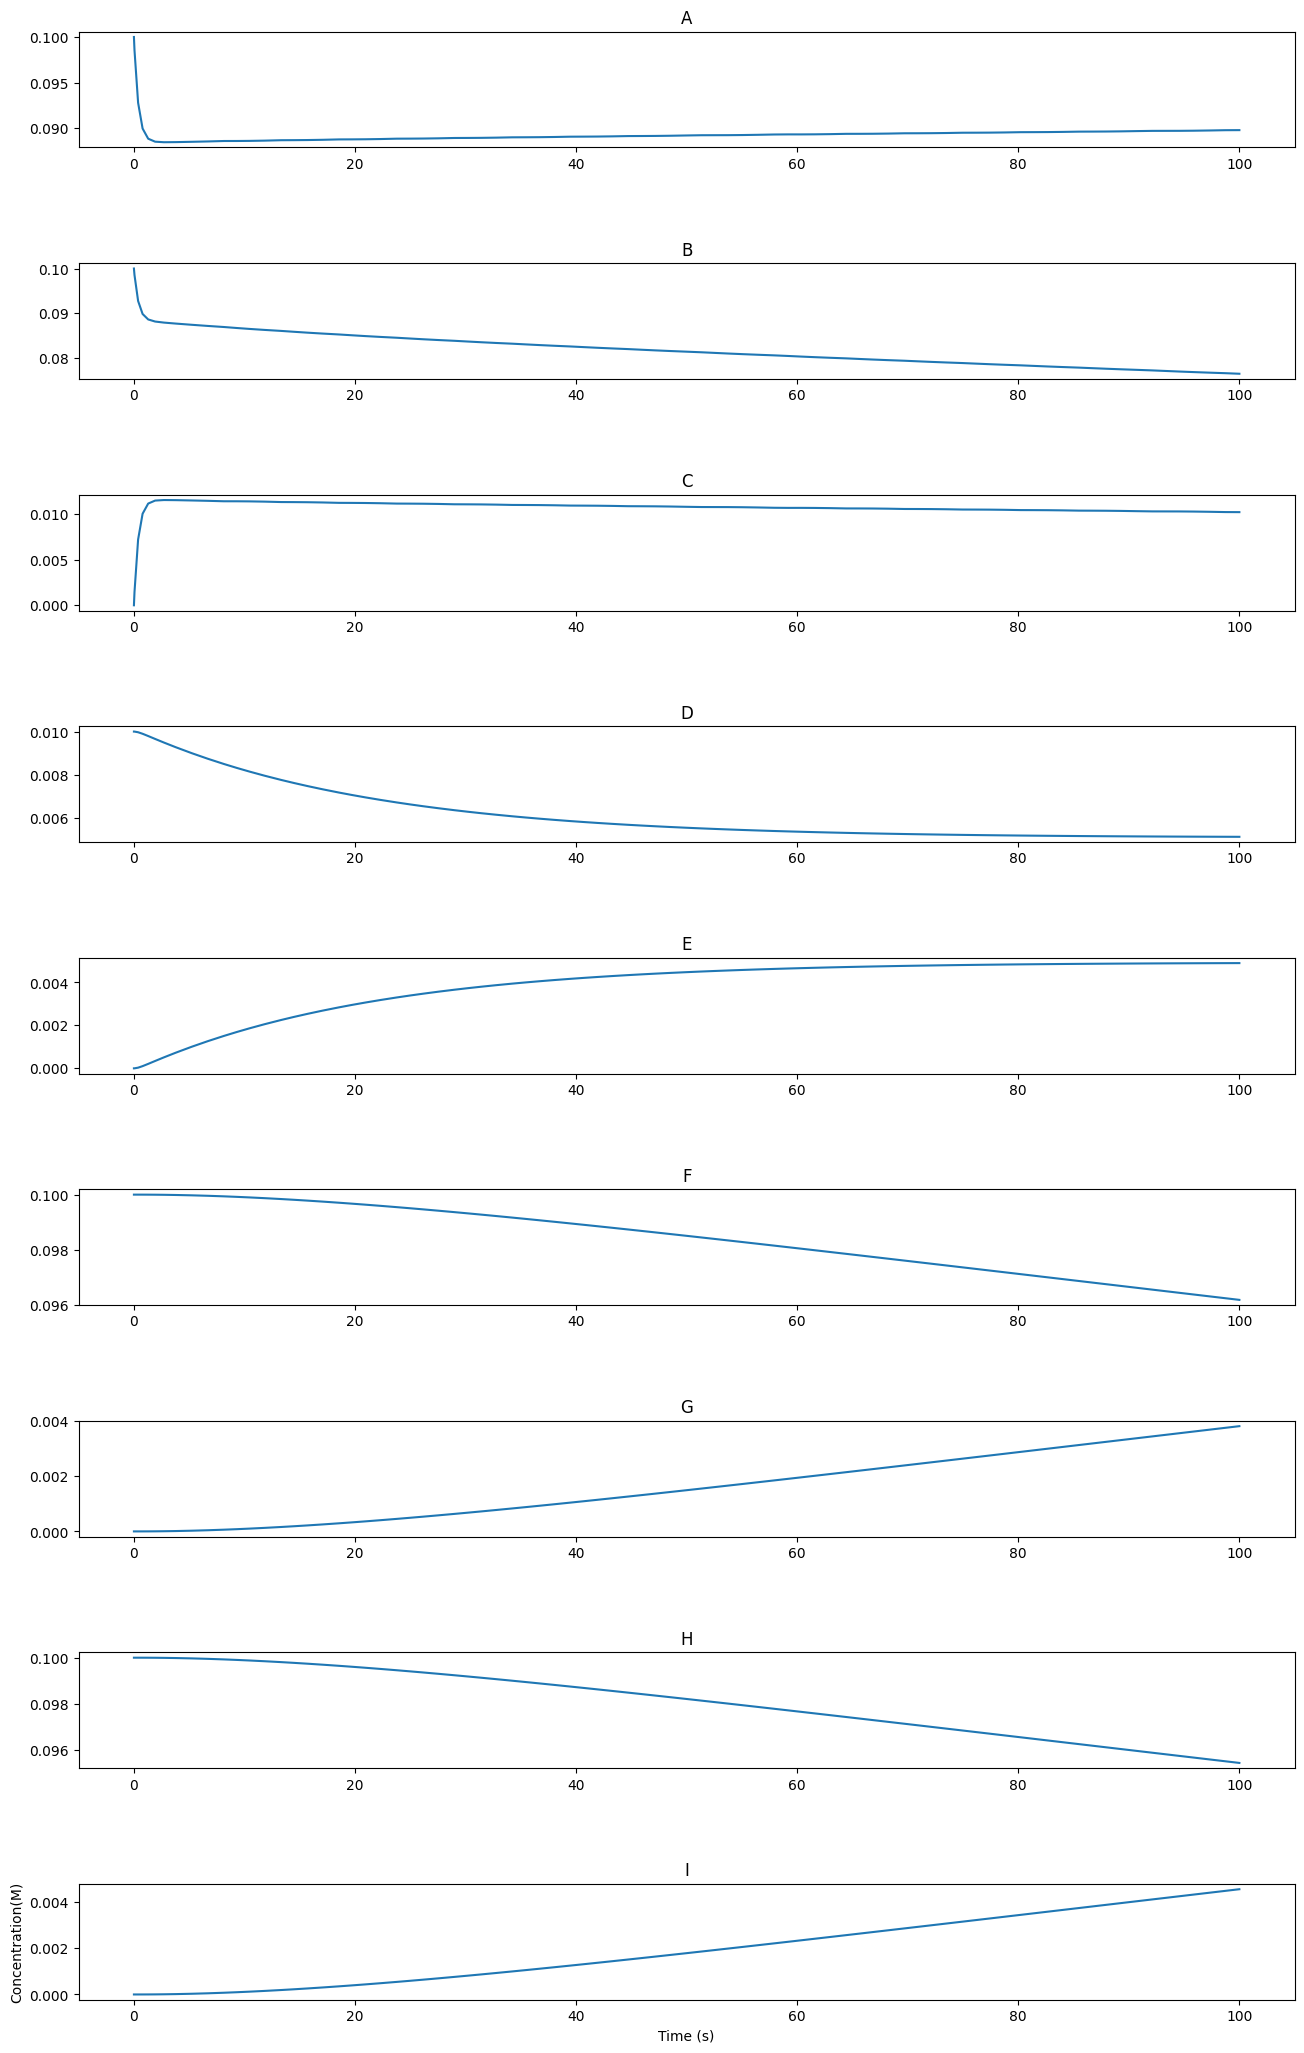

In [26]:
# COMPLICATED REACTION MECHANISM

#given initial concentrations
A0 = 0.10 #M
B0 = 0.10 #M
C0 = 0 #M
D0 = 0.01 #M
E0 = 0 #M
F0 = 0.10 #M
G0 = 0 #M
H0 = 0.10 #M
I0 = 0 #M

#dgiven rate constants
k1 = 3 # M-1 s-1
k2 = 2 # s-1
k3 = 2 # M-1 s-1
k4 = 0.1 # M-1 s-1
k5 = 0.12 # M-1 s-1

# define the functions for the differential rate equations
def complicated_reaction(t,concentrations,k1,k2,k3,k4,k5):
  A, B, C, D, E, F, G, H, I = concentrations
  dAdt = - k1*A*B + k2*C + k3*C*D
  dBdt = - k1*A*B + k2*C
  dCdt = k1*A*B - k2*C - k3*C*D
  dDdt = - k3*C*D + k4*E*F+ k5*E*H
  dEdt = k3*C*D - k4*E*F - k5*E*H
  dFdt = - k4*E*F
  dGdt = k4*E*F
  dHdt = - k5*E*H
  dIdt = k5*E*H
  return[dAdt,dBdt,dCdt,dDdt,dEdt,dFdt,dGdt,dHdt,dIdt]

#time span for integration
time_span = (0,100)

#solving the ODE
solution = solve_ivp(complicated_reaction,time_span,[A0,B0,C0,D0,E0,F0,G0,H0,I0],args = (k1,k2,k3,k4,k5,), time_eval=(0,100,100))

#plotting the concentration vs time graph
plt.figure(figsize = (10, 10))
figure, axis = plt.subplots(9, 1)
plt.xlabel('Time (s)') #xlabel
plt.ylabel('Concentration(M)') #ylabel

# For A Function
axis[0].plot(solution.t,solution.y[0],label='A')
axis[0].set_title("A")

# For B Function
axis[1].plot(solution.t,solution.y[1],label='B')
axis[1].set_title("B")

# For C Function
axis[2].plot(solution.t,solution.y[2],label='C')
axis[2].set_title("C")

# For D Function
axis[3].plot(solution.t,solution.y[3],label='D')
axis[3].set_title("D")

# For E Function
axis[4].plot(solution.t,solution.y[4],label='E')
axis[4].set_title("E")

# For F Function
axis[5].plot(solution.t,solution.y[5],label='F')
axis[5].set_title("F")

# For G Function
axis[6].plot(solution.t,solution.y[6],label='G')
axis[6].set_title("G")

# For H Function
axis[7].plot(solution.t,solution.y[7],label='H')
axis[7].set_title("H")

# For I Function
axis[8].plot(solution.t,solution.y[8],label='I')
axis[8].set_title("I")

plt.subplots_adjust(left=0.1,
                    bottom=0.9,
                    right=2,
                    top=5,
                    wspace=0.4,
                    hspace=1.0)
plt.show()